In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(y_test,predict):
    cm = confusion_matrix(y_test,predict)
    conf_matrix=pd.DataFrame(data=cm,columns=['blues_pred', 'classical_pred', 'country_pred', 'disco_pred', 'hiphop_pred', 'jazz_pred', 'metal_pred', 'pop_pred', 'reggae_pred', 'rock_pred'],index=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')

In [3]:
df = pd.read_csv('C:/Users/murta/Downloads/archive/Data/features_3_sec.csv')
df.head()
df = df.drop(['filename'], axis = 1)
genre_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()
x = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       293
           1       0.90      0.94      0.92       315
           2       0.67      0.55      0.60       316
           3       0.64      0.61      0.63       306
           4       0.72      0.65      0.68       291
           5       0.80      0.82      0.81       311
           6       0.82      0.84      0.83       300
           7       0.77      0.84      0.80       300
           8       0.68      0.65      0.67       292
           9       0.51      0.56      0.53       273

    accuracy                           0.72      2997
   macro avg       0.71      0.72      0.71      2997
weighted avg       0.72      0.72      0.72      2997



<Figure size 640x480 with 0 Axes>

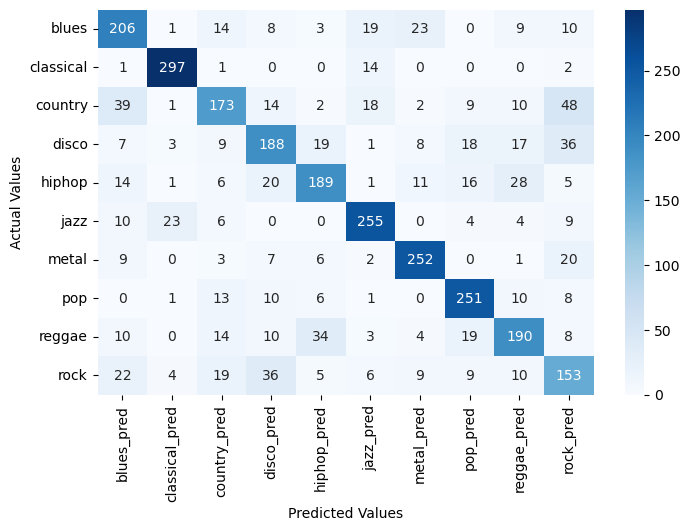

In [4]:
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))

In [5]:
grid = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv = 10)
logreg_cv.fit(x_train,y_train)

print('tuned hpyerparameters :(best parameters) ',logreg_cv.best_params_)
print('accuracy :',logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.7217240956468425


              precision    recall  f1-score   support

           0       0.66      0.69      0.68       293
           1       0.89      0.95      0.92       315
           2       0.67      0.54      0.60       316
           3       0.65      0.64      0.65       306
           4       0.72      0.64      0.68       291
           5       0.80      0.81      0.81       311
           6       0.82      0.83      0.83       300
           7       0.76      0.83      0.79       300
           8       0.67      0.65      0.66       292
           9       0.49      0.56      0.52       273

    accuracy                           0.72      2997
   macro avg       0.71      0.71      0.71      2997
weighted avg       0.72      0.72      0.72      2997



<Figure size 640x480 with 0 Axes>

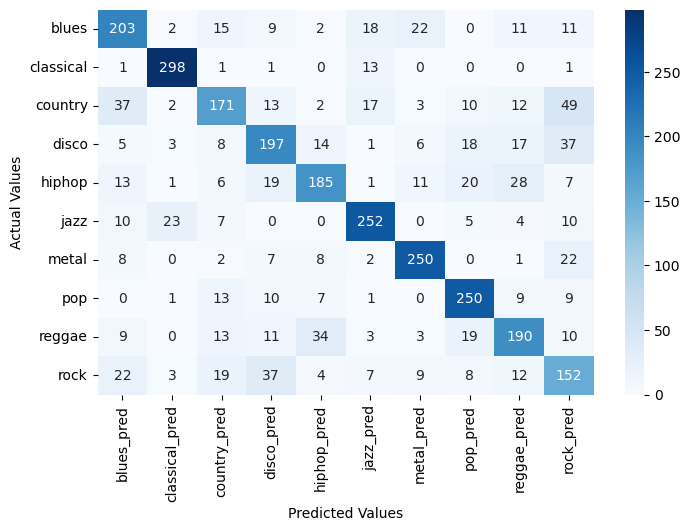

In [7]:
model_tuned = LogisticRegression(penalty = 'l2', C = 100)
model_tuned.fit(x_train, y_train)
improved_predict = model_tuned.predict(x_test)
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(y_test, improved_predict)
print(classification_report(y_test, improved_predict))